# 3.3 애스컴의 예

2장과 3장에서 데이터의 다양한 특징을 평균이나 분산, 상관계수라는 수치 지표를 통해 분석하는 방버을 배웠다. 그런데 수치로 데이터를 정리하면 많은 정보를 잃어버릴 수 있으므로 주의해야 한다.

동일해 보이는 지표를 가진 데이터라도 그림으로 나타내면 조종 전혀 다른 데이터가 되곤한다.

동일한 지표를 가지고 잇지만 전혀 다른 데이터가 되는 예로, 앤스컴의 예라고 불리는 데이터를 사용해서 살펴보겠다.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

anscombe_data = np.load("../data/ch3_anscombe.npy")
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [17]:
# 각 데이터의 평균, 분산, 상관계수, 희귀직선을 계산하여 DataFrame으로 정리한다.

stats_df = pd.DataFrame(index=["X_mean", "X_variance", "Y_mean", "Y_variance", "X&Y_correlation", "X&Y_regression line"])

for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)

    stats_df[f'data{i+1}'] = \
    [f"{np.mean(dataX):.2f}",
     f"{np.var(dataX):.2f}",
     f"{np.mean(dataY):.2f}",
     f"{np.var(dataY):.2f}",
     f"{np.corrcoef(dataX, dataY)[0,1]:.2f}",
     f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x"]

stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


모든 데이터가 평균부터 회귀직선 식까지 전부 일치한다. 결국 지표상으로 보면 이 네가지 데이터는 모두 동일하다.

이 네가지 데이터가 완전히 동일한지 확인하기 위해 산점도를 그려보자

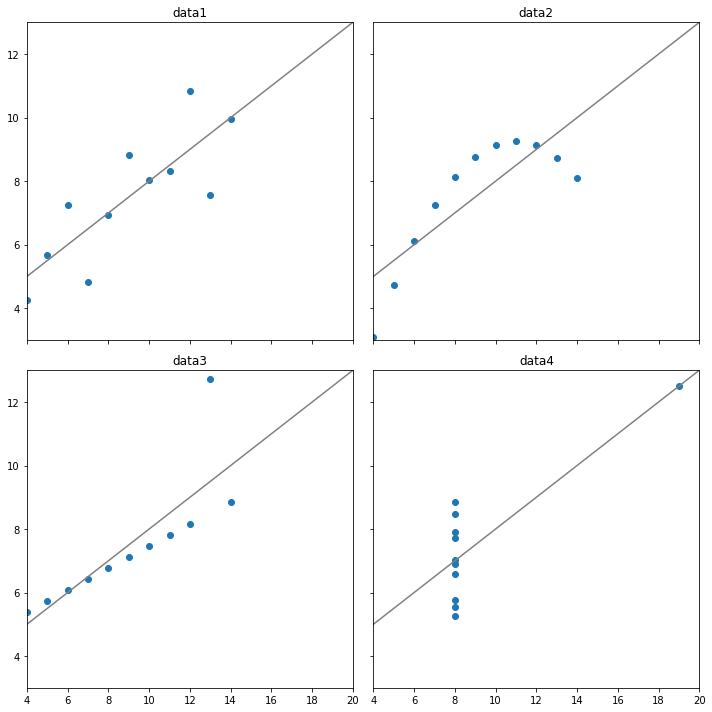

In [23]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
     poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
     poly_1d = np.poly1d(poly_fit)
     ys = poly_1d(xs)

     # 그리는 영역을 선택
     ax = axes[i//2, i%2]
     ax.set_xlim([4, 20])
     ax.set_ylim([3, 13])

     # 타이틀 부여
     ax.set_title(f"data{i+1}")

     ax.scatter(data[:, 0], data[:, 1])
     ax.plot(xs, ys, color="gray")

plt.tight_layout()
plt.show()

위 그림에서 볼 수 있듯이, 이들 데이터느 전혀 다른 분포를 띠고 있다. 평균이나 분산이라는 지표가 많은 의미를 갖지만, 이러한 지표들을 과신하면 안되다.
앤스컴의 예는 데이터를 분석할 때는 가능하면 그림을 그려야 한다는 것을 알려주고 있다.